In [226]:
import pandas as pd
import seaborn as sns

attendance = "2018_-2019_Monthly_Grade_Level_Attendance_By_School.csv"
ratio = "2018-2019_Average_Class_Size_School_-_Pupil_to_Teacher_Ratio.xlsx"

attend= pd.read_csv(attendance)
size= pd.read_excel(ratio)

In [275]:
size.head()


,DBN,School Name,School Pupil-Teacher Ratio
0,01M015,PS 015 ROBERTO CLEMENTE,7.410202
1,01M019,PS 019 ASHER LEVY,6.600191
2,01M020,PS 020 ANNA SILVER,11.697750
3,01M034,PS 034 FRANKLIN D ROOSEVELT,9.149072
4,01M063,THE STAR ACADEMY - PS63,10.783790


In [276]:
attend.head()


,DBN,MonthCode,CalMonth,SchoolYear,GradeLevel,GradeSort,RosterCount,Present,Absent
0,01M184,1,Sep,2018-19,0K,0,62,903,19
1,01M184,1,Sep,2018-19,PK,-1,36,535,5
2,01M188,1,Sep,2018-19,01,1,39,497,69
3,01M188,1,Sep,2018-19,02,2,35,441,34
4,01M188,1,Sep,2018-19,03,3,51,637,92


In [229]:
attend.pop('Released')
#renaming the column school to DBN to make merge easier
#School is the same thing as DBN

attend.rename(columns = {"School":"DBN"}, inplace=True)


In [231]:
#merging class size ratio with attendance dataset
data = pd.merge(attend, size)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [232]:
data.head()

,DBN,MonthCode,CalMonth,SchoolYear,GradeLevel,GradeSort,RosterCount,Present,Absent,School Name,School Pupil-Teacher Ratio
0,01M184,1,Sep,2018-19,0K,0,62,903,19,PS 184M SHUANG WEN,13.33973
1,01M184,1,Sep,2018-19,PK,-1,36,535,5,PS 184M SHUANG WEN,13.33973
2,01M184,1,Sep,2018-19,01,1,65,950,13,PS 184M SHUANG WEN,13.33973
3,01M184,1,Sep,2018-19,02,2,64,949,11,PS 184M SHUANG WEN,13.33973
4,01M184,1,Sep,2018-19,03,3,50,727,6,PS 184M SHUANG WEN,13.33973


In [1]:
#data.pop('School Name')
#data.pop('GradeLevel')
#data.pop('RosterCount')

In [234]:
data.head()

,DBN,MonthCode,CalMonth,SchoolYear,GradeSort,Present,Absent,School Pupil-Teacher Ratio
0,01M184,1,Sep,2018-19,0,903,19,13.33973
1,01M184,1,Sep,2018-19,-1,535,5,13.33973
2,01M184,1,Sep,2018-19,1,950,13,13.33973
3,01M184,1,Sep,2018-19,2,949,11,13.33973
4,01M184,1,Sep,2018-19,3,727,6,13.33973


In [235]:
#sorting the age to where students have more control over if they skip school or not
driving_age = data[data["GradeSort"]>9]

driving_age.head()

,DBN,MonthCode,CalMonth,SchoolYear,GradeSort,Present,Absent,School Pupil-Teacher Ratio
161,01M292,1,Sep,2018-19,10,980,68,9.0647
162,01M292,1,Sep,2018-19,11,482,55,9.0647
163,01M292,1,Sep,2018-19,12,360,35,9.0647
165,01M292,2,Oct,2018-19,10,1471,87,9.0647
166,01M292,2,Oct,2018-19,11,686,62,9.0647


In [236]:
#create a new column that is absent percentage
driving_age["Absent_Percent"]= (((driving_age["Absent"])/(driving_age["Present"] + driving_age["Absent"]))*100)

driving_age.head()


/var/folders/j3/1nkjngl51fn2qm46cls3nmxr0000gn/T/ipykernel_19506/185131737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driving_age["Absent_Percent"]= (((driving_age["Absent"])/(driving_age["Present"] + driving_age["Absent"]))*100)


,DBN,MonthCode,CalMonth,SchoolYear,GradeSort,Present,Absent,School Pupil-Teacher Ratio,Absent_Percent
161,01M292,1,Sep,2018-19,10,980,68,9.0647,6.488550
162,01M292,1,Sep,2018-19,11,482,55,9.0647,10.242086
163,01M292,1,Sep,2018-19,12,360,35,9.0647,8.860759
165,01M292,2,Oct,2018-19,10,1471,87,9.0647,5.584082
166,01M292,2,Oct,2018-19,11,686,62,9.0647,8.288770


In [2]:
#driving_age.pop("CalMonth")
#driving_age.pop("MonthCode")

In [3]:
#driving_age.pop("DBN")

In [280]:
#splitting each grade up to make data size manageable and show
#difference between grades
grade10= driving_age[driving_age["GradeSort"]==10]
grade11=driving_age[driving_age["GradeSort"]==11]
grade12=driving_age[driving_age["GradeSort"]==12]
grade10.head()

,CalMonth,SchoolYear,GradeSort,Present,Absent,School Pupil-Teacher Ratio,Absent_Percent
161,Sep,2018-19,10,980,68,9.0647,6.488550
165,Oct,2018-19,10,1471,87,9.0647,5.584082
169,Nov,2018-19,10,1173,82,9.0647,6.533865
173,Dec,2018-19,10,958,92,9.0647,8.761905
177,Jan,2018-19,10,1001,108,9.0647,9.738503


In [240]:
import matplotlib.pyplot as plt

#sns.set_theme(style = "whitegrid")

#f, ax = plt.subplots(figsize=(10,15))
                     
#sns.set_color_codes("muted")
#sns.barplot(x="School Pupil-Teacher Ratio", y="CalMonth", data=grade10,label= "Grade 10",color="b")

#sns.set_color_codes("pastel")
#sns.barplot(x="Absent_Percent", y="CalMonth", data=grade10,label= "Student/Teacher",color="b")

#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0,20),ylabel="", xlabel="Student/Teacher vs. Absents")
#sns.despine(left=True, bottom=True)

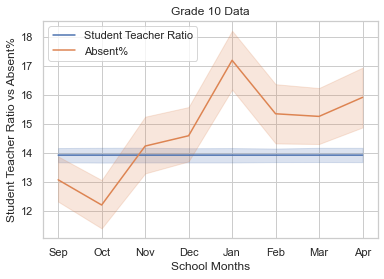

<Figure size 720x720 with 0 Axes>

In [281]:
#grade 10 graph

fig, ax = plt.subplots()

ax = sns.lineplot(x="CalMonth", y="School Pupil-Teacher Ratio", data= grade10)
ax1 = sns.lineplot(x="CalMonth", y="Absent_Percent", data= grade10)
plt.figure(figsize= (10,10))
ax.set_xlabel("School Months", fontsize ="12")
ax.set(title= "Grade 10 Data")
ax.set_ylabel("Student Teacher Ratio vs Absent%", fontsize ="12")
ax.legend(labels=["Student Teacher Ratio","Absent%"])



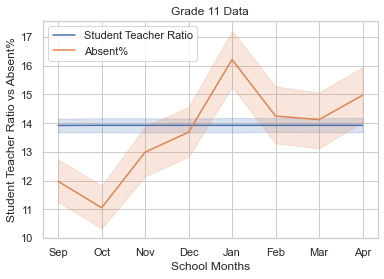

<Figure size 720x720 with 0 Axes>

In [282]:
#grade 11 graph

fig, ax = plt.subplots()
ax = sns.lineplot(x="CalMonth", y="School Pupil-Teacher Ratio", data= grade11)
ax1 = sns.lineplot(x="CalMonth", y="Absent_Percent", data= grade11)
plt.figure(figsize= (10,10))
ax.set_xlabel("School Months", fontsize ="12")
ax.set(title= "Grade 11 Data")
ax.set_ylabel("Student Teacher Ratio vs Absent%", fontsize ="12")
ax.legend(labels=["Student Teacher Ratio","Absent%"])



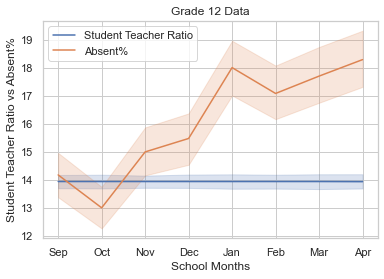

<Figure size 720x720 with 0 Axes>

In [283]:
#grade 12 graph
fig, ax = plt.subplots()
ax = sns.lineplot(x="CalMonth", y="School Pupil-Teacher Ratio", data= grade12)
ax1 = sns.lineplot(x="CalMonth", y="Absent_Percent", data= grade12)
plt.figure(figsize= (10,10))
ax.set_xlabel("School Months", fontsize ="12")
ax.set(title= "Grade 12 Data")
ax.set_ylabel("Student Teacher Ratio vs Absent%", fontsize ="12")
ax.legend(labels=["Student Teacher Ratio","Absent%"])

